In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report


import warnings 
warnings.filterwarnings("ignore")





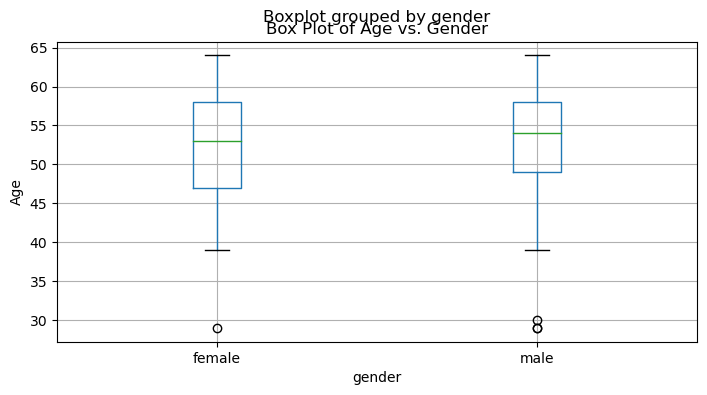

In [15]:

heart_info = pd.read_csv('heart_data.csv')
heart_info['age'] = heart_info['age'] // 365
heart_info['gender'] = heart_info['gender'].replace({1: 'male', 2: 'female'})
ax = heart_info.boxplot(column="age", by="gender", figsize=(8,4))
ax.set_ylabel("Age")
ax.set_title("Box Plot of Age vs. Gender")

plt.show()

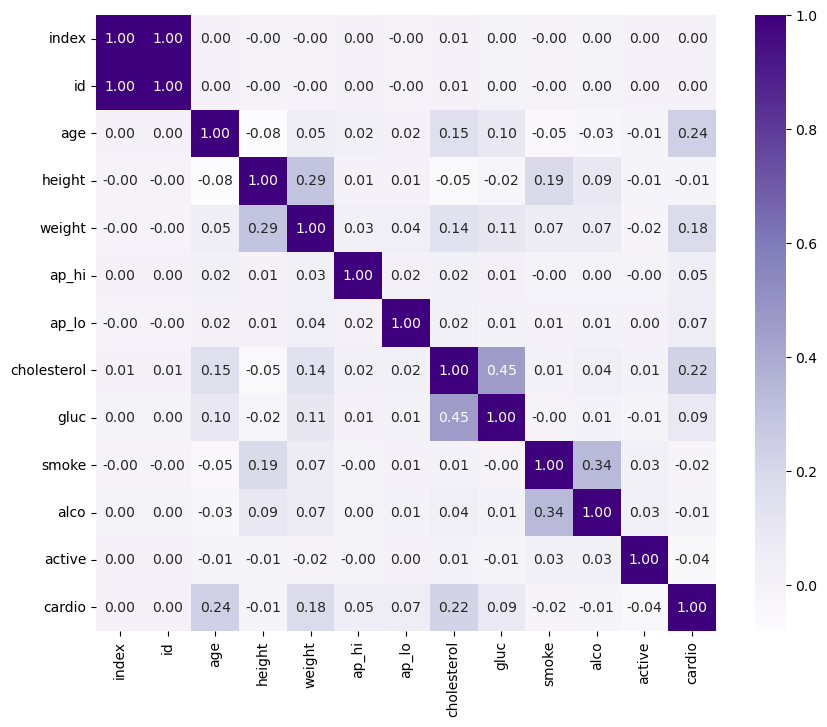

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_info.corr(), annot=True, cmap="Purples", fmt=".2f")
plt.show()


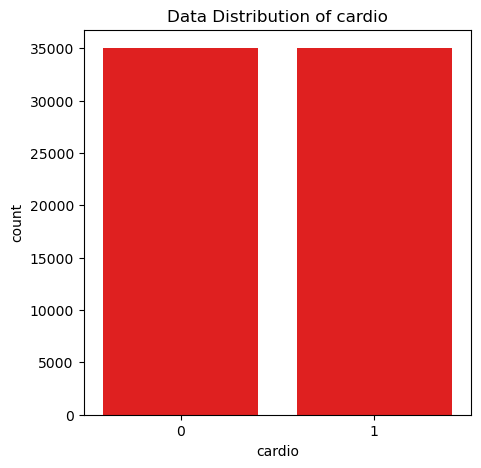

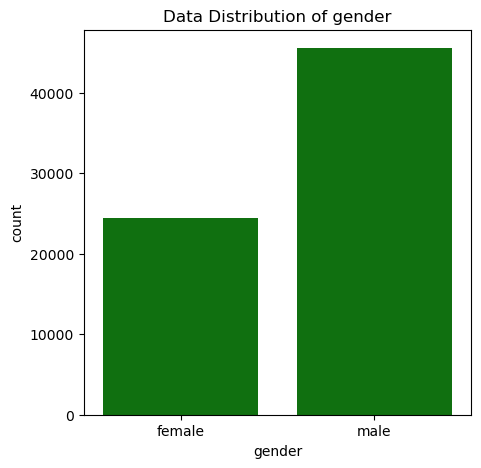

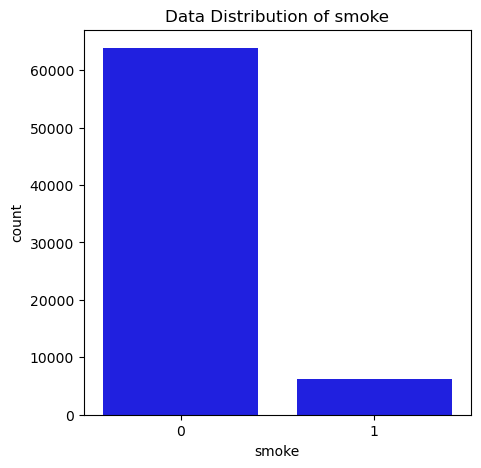

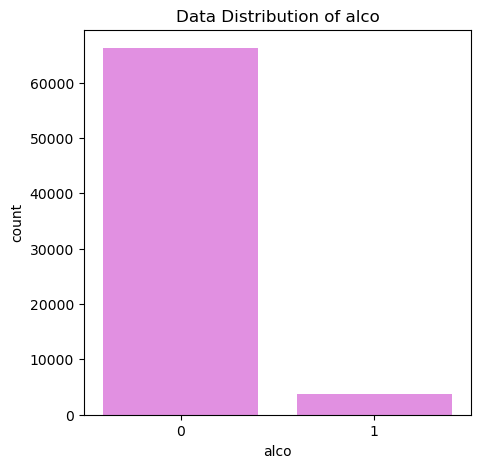

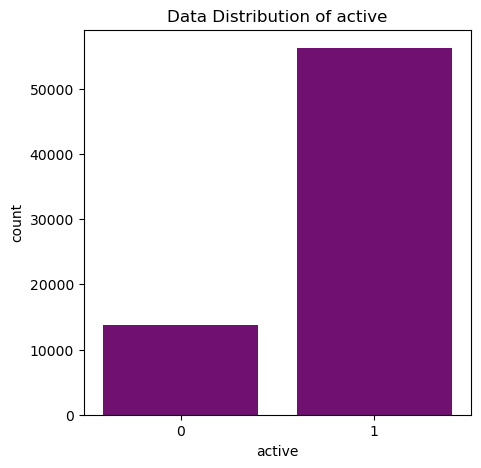

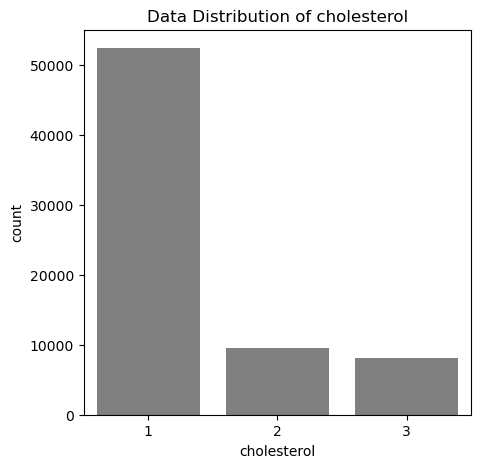

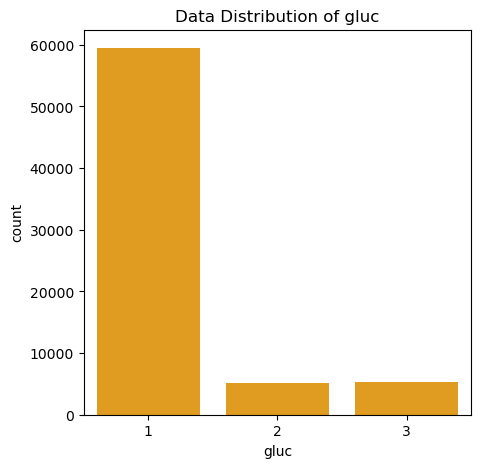

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color_list = ["red", "green", "blue", "violet", "purple", "grey", "orange"]
col_list = ["cardio", "gender", "smoke", "alco", "active", "cholesterol", "gluc"]
for i in range(len(col_list)):
    plt.figure(figsize=(5, 5))
    sns.countplot(data=heart_info, x=heart_info[col_list[i]], color=color_list[i])
    plt.title(f"Data Distribution of {col_list[i]}")
    plt.show()


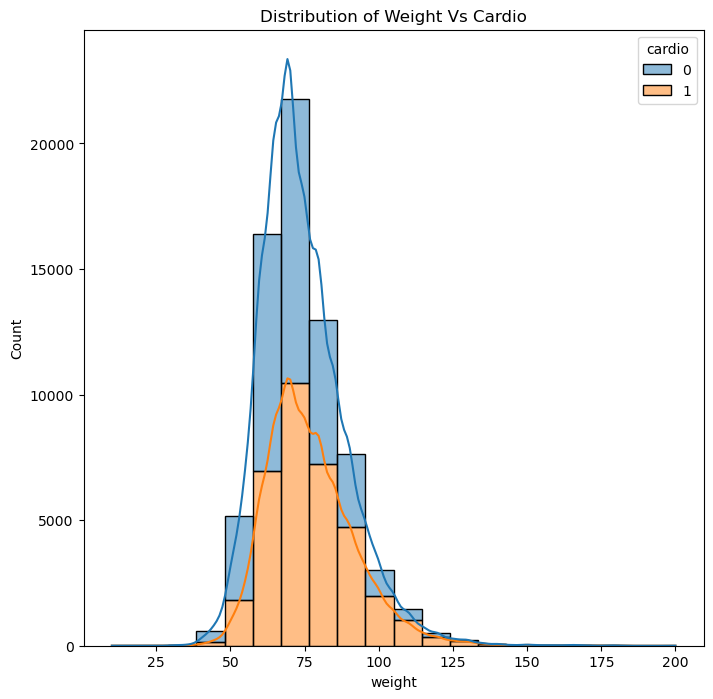

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.histplot(data=heart_info, x=heart_info["weight"], hue="cardio", multiple='stack', kde=True, bins=20)
plt.title("Distribution of Weight Vs Cardio")
plt.show()


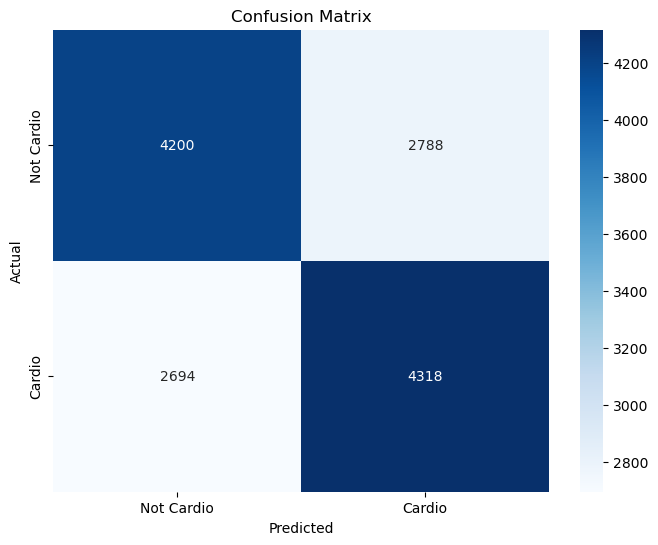

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
heart_info = pd.read_csv('heart_data.csv')
target_column = 'cardio'
features = ['age', 'gender', 'smoke', 'alco', 'active', 'cholesterol', 'gluc', 'weight', 'height']
X_train, X_test, y_train, y_test = train_test_split(
    heart_info[features], heart_info[target_column], test_size=0.2, random_state=42
)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Cardio', 'Cardio'],
            yticklabels=['Not Cardio', 'Cardio'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





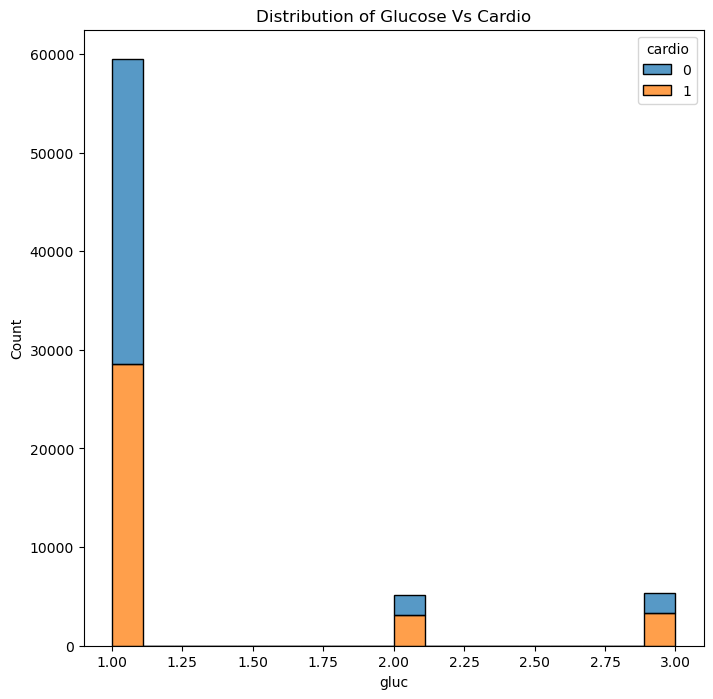

In [31]:
plt.figure(figsize=(8,8))
sns.histplot(data= heart_info, x=heart_info["gluc"], hue="cardio", multiple='stack')
plt.title("Distribution of Glucose Vs Cardio")
plt.show()

In [9]:
import pandas as pd
heart_info = pd.read_csv('heart_data.csv')
top_10_values = heart_info.nlargest(10, 'ap_hi')[['id', 'ap_hi']]
print("Top 10 IDs and their corresponding ap_hi values:")
for index, row in top_10_values.iterrows():
    print(f"ID: {row['id']}, ap_hi: {row['ap_hi']}")


Top 10 IDs and their corresponding ap_hi values:
ID: 58374, ap_hi: 16020
ID: 36339, ap_hi: 14020
ID: 36414, ap_hi: 14020
ID: 66998, ap_hi: 14020
ID: 67502, ap_hi: 14020
ID: 79116, ap_hi: 13010
ID: 79679, ap_hi: 13010
ID: 11089, ap_hi: 11500
ID: 73356, ap_hi: 11020
ID: 99089, ap_hi: 2000
